## Observations and Insights 

In [2]:
#References:
#https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
#https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values
#https://www.kite.com/python/answers/how-to-return-a-column-of-a-pandas-dataframe-as-a-list-in-python#:~:text=To%20return%20the%20index%20column,convert%20index_column%20into%20a%20list.
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
#https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/

In [3]:
#To Do
#Save figures to images/output folder
#Write README

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')
# Display the data table for preview
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Checking the number of mice.
mice_total = study_data['Mouse ID'].nunique()
mice_total

249

In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = study_data[study_data.duplicated(subset=(['Mouse ID', 'Timepoint']),keep=False)]
duplicated_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_data = study_data.loc[study_data['Mouse ID']=='g989']
duplicated_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_cleaned = study_data.loc[study_data['Mouse ID']!= 'g989']
mouse_metadata_clean = mouse_metadata.loc[mouse_metadata['Mouse ID']!= 'g989']
study_data_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Checking the number of mice in the clean DataFrame.
mice_total_new = study_data_cleaned['Mouse ID'].nunique()
mice_total_new

248

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_grouped = study_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)']

drug_mean = drug_grouped.mean()
drug_median = drug_grouped.median()
drug_var = drug_grouped.var()
drug_std = drug_grouped.std()
drug_sem = drug_grouped.sem()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug_summary = pd.DataFrame({
    'Mean':drug_mean,
    'Median': drug_median,
    'Variance': drug_var,
    'Standard Deviation': drug_std,
    'SEM': drug_sem
})
drug_summary


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

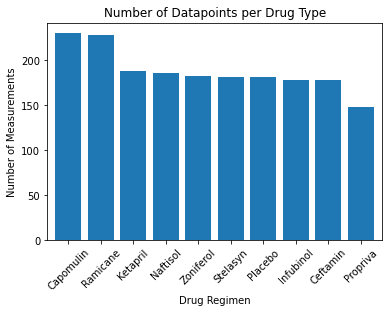

In [33]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#x_axis is treatment types
#y_axis is number of datapoints per treatment type
datapoints_per_drug = study_data_cleaned.groupby(['Drug Regimen'])['Mouse ID'].count().sort_values(ascending=False)


datapoints_per_drug.plot(kind='bar', width= 0.8, title='Number of Datapoints per Drug Type', xlabel= 'Drug Regimen', ylabel= 'Number of Measurements')
plt.xticks(rotation=45)
plt.show()

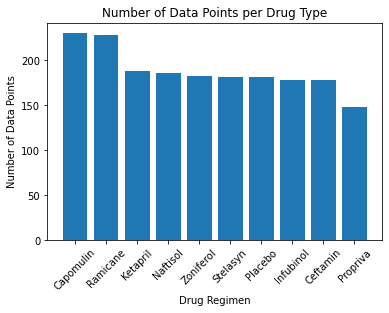

In [34]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_types = datapoints_per_drug.index
plt.bar(drug_types, datapoints_per_drug)
plt.xticks(rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points per Drug Type')
plt.show()

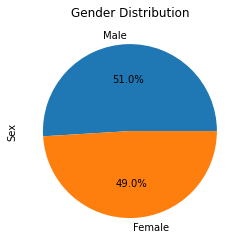

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#gender_distribution = mouse_metadata_clean['Sex'].value_counts()
gender_distribution = study_data_cleaned['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title= 'Gender Distribution')
plt.show()

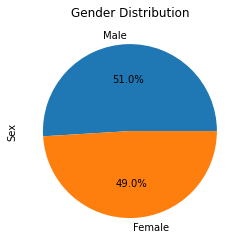

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_distribution, labels= gender_distribution.keys(), autopct='%1.1f%%')
plt.ylabel('Sex')
plt.title('Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs_df = study_data_cleaned.loc[(study_data_cleaned['Drug Regimen']=='Capomulin') |
                                       (study_data_cleaned['Drug Regimen']=='Ramicane') |
                                       (study_data_cleaned['Drug Regimen']=='Infubinol') |
                                       (study_data_cleaned['Drug Regimen']=='Ceftamin')
                                      ]
four_drugs_df.head(10)
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = four_drugs_df.groupby('Mouse ID').max()['Timepoint']
last_timepoint.rename('Max Timepoint')
last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
compare_timepoints_df = pd.merge(four_drugs_df, last_timepoint, how='inner', on='Mouse ID')
last_timepoints_df = compare_timepoints_df.loc[compare_timepoints_df['Timepoint_x']==compare_timepoints_df['Timepoint_y']]
last_timepoints_clean = last_timepoints_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
last_timepoints_clean

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
39,m601,Capomulin,28.430964
49,g791,Ramicane,29.128472
...,...,...,...
773,x822,Ceftamin,61.386660
783,y163,Infubinol,67.685569
793,y769,Ceftamin,68.594745
803,y865,Ceftamin,64.729837


In [38]:
#calculates lower and upper bounds
#input = series, output = floats
def calculateIQR(df):
    quartiles = df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    return lower_bound, upper_bound

In [39]:
#Identify potential Ramicane outliers using IQR
ramicane_final = last_timepoints_clean['Tumor Volume (mm3)'].loc[last_timepoints_clean['Drug Regimen']=='Ramicane']
lower_bound_r, upper_bound_r = calculateIQR(ramicane_final)
ramicane_outliers = [volume for volume in ramicane_final if volume < lower_bound_r or volume >upper_bound_r]
if ramicane_outliers == []:
    print('There are no potential Ramican outliers.')
else:
    print(f'Potential Ramican outliers include: {ramicane_outliers}')

#Identify potential Capomulin outliers using IQR
capomulin_final = last_timepoints_clean['Tumor Volume (mm3)'].loc[last_timepoints_clean['Drug Regimen']=='Capomulin']
lower_bound_ca, upper_bound_ca = calculateIQR(capomulin_final)
capomulin_outliers = [volume for volume in capomulin_final if volume < lower_bound_ca or volume >upper_bound_ca]
if capomulin_outliers == []:
    print('There are no potential Capomulin outliers.')
else:
    print(f'Potential Capomulin outliers include: {capomulin_outliers}')

#Identify potential Ceftamin outliers using IQR
ceftamin_final = last_timepoints_clean['Tumor Volume (mm3)'].loc[last_timepoints_clean['Drug Regimen']=='Ceftamin']
lower_bound_ce, upper_bound_ce = calculateIQR(ceftamin_final)
ceftamin_outliers = [volume for volume in ceftamin_final if volume < lower_bound_ce or volume >upper_bound_ce]
if ceftamin_outliers == []:
    print('There are no potential Ceftamin outliers.')
else:
    print(f'Potential Ceftamin outliers include: {ceftamin_outliers}')

#Identify potential Infubinol outliers using IQR
infubinol_final = last_timepoints_clean['Tumor Volume (mm3)'].loc[last_timepoints_clean['Drug Regimen']=='Infubinol']
lower_bound_i, upper_bound_i = calculateIQR(infubinol_final)
infubinol_outliers = [volume for volume in infubinol_final if volume < lower_bound_i or volume >upper_bound_i]
if infubinol_outliers == []:
    print('There are no potential Infubinol outliers.')
else:
    print(f'Potential Infubinol outliers include: {infubinol_outliers}')
    

There are no potential Ramican outliers.
There are no potential Capomulin outliers.
There are no potential Ceftamin outliers.
Potential Infubinol outliers include: [36.321345799999996]


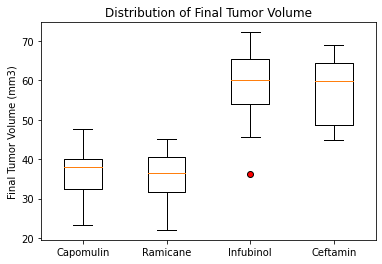

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

outlier_format = dict(markerfacecolor='r', marker='o')
plt.boxplot([capomulin_final, ramicane_final, infubinol_final, ceftamin_final], flierprops=outlier_format)
plt.title('Distribution of Final Tumor Volume')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], treatments)

plt.show()

## Line and Scatter Plots

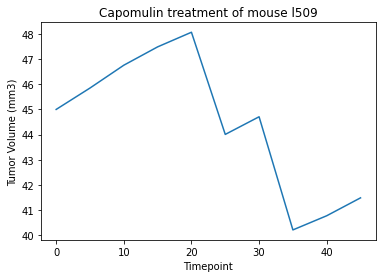

In [41]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_l509 = study_data_cleaned.loc[study_data_cleaned['Mouse ID']== 'l509']
mouse_l509.plot(kind='line', 
                x= 'Timepoint', 
                y= 'Tumor Volume (mm3)', 
                title='Capomulin treatment of mouse l509', 
                legend= False,
                xlabel='Timepoint', 
                ylabel='Tumor Volume (mm3)'
               )
plt.show()

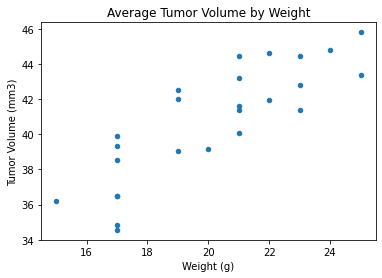

In [42]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = study_data_cleaned.loc[study_data_cleaned['Drug Regimen']=='Capomulin']
avg_tumor_by_mouse = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = mouse_metadata_clean[['Mouse ID','Weight (g)']]

tumor_and_weight = pd.merge(mouse_weight, avg_tumor_by_mouse, how='right', on='Mouse ID')
tumor_and_weight.plot(kind='scatter', x= 'Weight (g)', y= 'Tumor Volume (mm3)', title= 'Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

Correlation Coefficient: [1.04134975]
R squared: 0.547715984419554


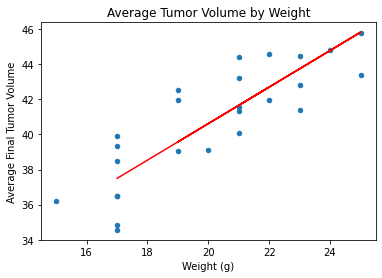

In [77]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Set up scatter plot
tumor_and_weight.plot(kind='scatter', x= 'Weight (g)', y= 'Tumor Volume (mm3)', title= 'Average Tumor Volume by Weight')

#Create training and testing sets
x_train, x_test, y_train, y_test = train_test_split(tumor_and_weight[['Weight (g)']], tumor_and_weight['Tumor Volume (mm3)'])

#Create linear regression object
regr = linear_model.LinearRegression()

#Train linear regression model using training set
regr.fit(x_train, y_train)

#Make predictions using testing set
y_pred = regr.predict(x_test)


#Calculate coefficients
print(f'Correlation Coefficient: {regr.coef_}')
print(f'R squared: {r2_score(y_test, y_pred)}')

#Plot linear regression
plt.plot(x_test, y_pred, color='r')
plt.ylabel('Average Final Tumor Volume')
plt.show()